In [204]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

In [205]:
# Switch to decimal format in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [206]:
# Load the housing data
df = pd.read_csv("Housing.csv")

In [207]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.000,545.000,545.000,545.000,545.000,545.000
mean,4766729.248,5150.541,2.965,1.286,1.806,0.694
std,1870439.616,2170.141,0.738,0.502,0.867,0.862
min,1750000.000,1650.000,1.000,1.000,1.000,0.000
25%,3430000.000,3600.000,2.000,1.000,1.000,0.000
50%,4340000.000,4600.000,3.000,1.000,2.000,0.000
75%,5740000.000,6360.000,3.000,2.000,2.000,1.000
max,13300000.000,16200.000,6.000,4.000,4.000,3.000


In [208]:
# Many of the variables are non-numeric
# E.g. yes/no columns and the status of furnishing
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [209]:
df.duplicated().sum()

0

In [210]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [211]:
from sklearn.preprocessing import LabelEncoder
variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [212]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [213]:
from sklearn.preprocessing import OneHotEncoder
variables = ['furnishingstatus']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [214]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [215]:
# see the materials on this trick, we can remove the last new column "unfurnished"
# since if the house is unfurnished, both furnished and semi-furnished will be 0
df.drop("furnishingstatus_unfurnished", axis=1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0


In [216]:
df.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,0,0,1


In [217]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [218]:
# version 1, SciPy, extreme outliers that go under -3 or over +3 in normal distribution
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [219]:
# if you have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished']]

# have only the target variable here (dependent variable)
y = df['price']

In [220]:
# a nice trick to get all 6 variables for our neural network
# first split 70% for training data, and save the last 30% for temporary variables
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# then split again the temporary variables by 50% (so if it was 30% originally => now it's
# 15%/15% (because 30% * 50% = 15%))

# so after this, we have 70% for training, 15% testing, and 15% validation
# => 100% in total
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [221]:
training_variable_amount = len(X.columns)

from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', save_best_only=True)

# Have all callbacks in a list,
# in this case there's just one
callback_list = [mc]


# create the structure of our neural network
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(training_variable_amount,)),
        layers.Dense(24, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dense(8, activation="relu"),
        layers.Dropout(0.1),
        layers.Dense(4, activation="relu"),
        layers.Dense(1)
    ]
)

# compile the neural network, use adam (most common one) as the optimiser
# and mean square error (mse) for the loss function (most common for regression problems)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002), loss='mse')

# show a quick recap of our structure
model.summary()

# start training
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_val, y_val), callbacks=callback_list)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_7 (Bat  (None, 13)                52        
 chNormalization)                                                
                                                                 
 dense_39 (Dense)            (None, 24)                336       
                                                                 
 dense_40 (Dense)            (None, 8)                 200       
                                                                 
 dropout_14 (Dropout)        (None, 8)                 0         
                                                                 
 dense_41 (Dense)            (None, 4)                 36        
                                                                 
 dense_42 (Dense)            (None, 1)                 5         
                                                      

11/11 [==============================] - 2s 28ms/step - loss: 23413739487232.0000 - val_loss: 28757196800000.0000
Epoch 2/300
11/11 [==============================] - 0s 10ms/step - loss: 23413735292928.0000 - val_loss: 28757190508544.0000
Epoch 3/300
11/11 [==============================] - 0s 9ms/step - loss: 23413733195776.0000 - val_loss: 28757186314240.0000
Epoch 4/300
11/11 [==============================] - 0s 9ms/step - loss: 23413731098624.0000 - val_loss: 28757180022784.0000
Epoch 5/300
11/11 [==============================] - 0s 10ms/step - loss: 23413724807168.0000 - val_loss: 28757161148416.0000
Epoch 6/300
11/11 [==============================] - 0s 9ms/step - loss: 23413716418560.0000 - val_loss: 28757140176896.0000
Epoch 7/300
11/11 [==============================] - 0s 10ms/step - loss: 23413699641344.0000 - val_loss: 28757100331008.0000
Epoch 8/300
11/11 [==============================] - 0s 10ms/step - loss: 23413676572672.0000 - val_loss: 28757033222144.0000
Epoch 9

<Axes: >

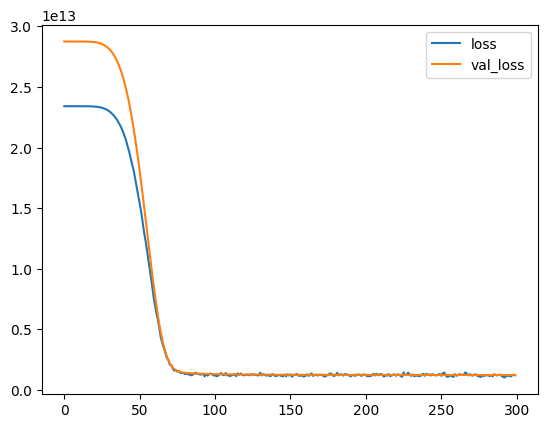

In [222]:
# Seeing if the model overfits
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [223]:
# After plotting the history
# load the best version of the model from the file
from keras.models import load_model
model = load_model("best_model.keras")

In [224]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
913925144576.0

Train data evaluation:
782460059648.0


In [225]:
# we need to calculate test predictions based on the TEST DATA SET
# for metrics that follow
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

3/3 [==============================] - 0s 3ms/step


,Test True Y,Model Predictions
0,3500000,3327938.500
1,3234000,3564383.500
2,3500000,4674641.500
3,4935000,5068590.500
4,3430000,4312101.500
...,...,...
70,4473000,3711024.250
71,3885000,4378795.500
72,3080000,2931982.500
73,4830000,4749980.000


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

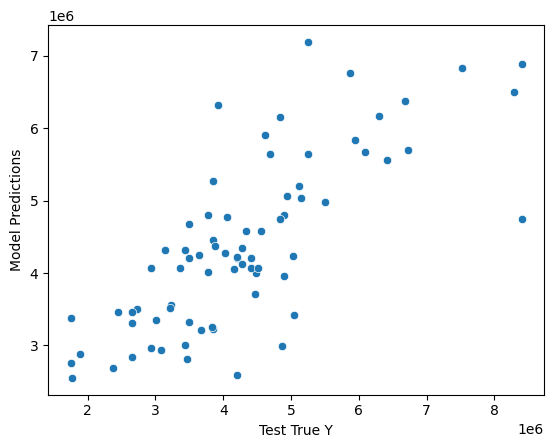

In [226]:
# compare the predictions to real values
# if these follow a diagonal line => they correlate well
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [227]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
715958.06 $

MSE
913925121201.5 $^2

RMSE:
955994.31 $

R-squared:
0.57

Explained variance score:
0.57
